<a href="https://colab.research.google.com/github/rachitkinger/e2e_ml_sklearn/blob/main/python_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratch  

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two'],
                    'C' : [1, 5, 5, 2, 5, 5],
                    'D' : [2.0, 5., 8., 1., 2., 9.]})


In [ ]:
df

,A,B,C,D
0,foo,one,1,2.0
1,bar,one,5,5.0
2,foo,two,5,8.0
3,bar,three,2,1.0
4,foo,two,5,2.0
5,bar,two,5,9.0


In [ ]:
df.groupby('A', as_index=False)[['C', 'D']].transform('mean').rename(columns={'C':'C_mean', 'D':'D_mean'})

,C_mean,D_mean
0,3.666667,4.0
1,4.000000,5.0
2,3.666667,4.0
3,4.000000,5.0
4,3.666667,4.0
5,4.000000,5.0


# Plotting library in Python    

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [ ]:
rng =np.random.default_rng(1303)

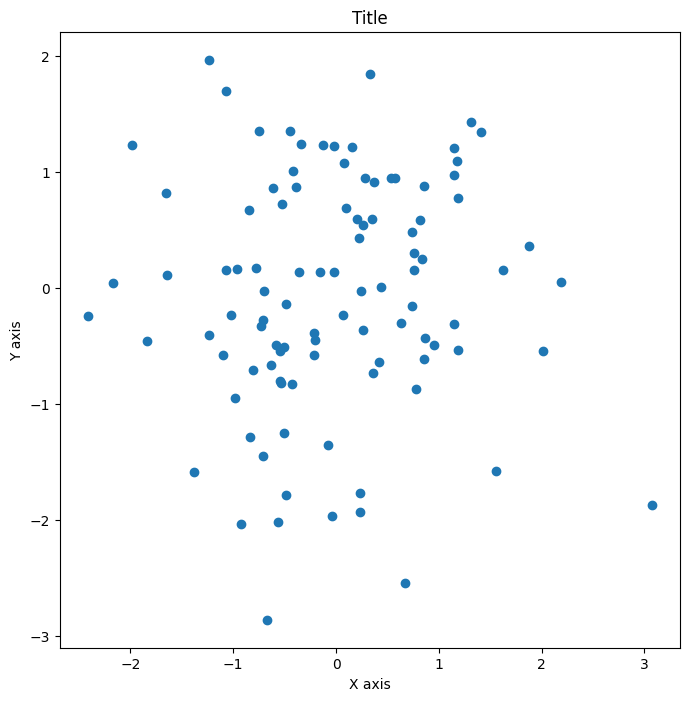

In [ ]:
fig, ax = subplots(figsize=(8,8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.scatter(x,y)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Title');

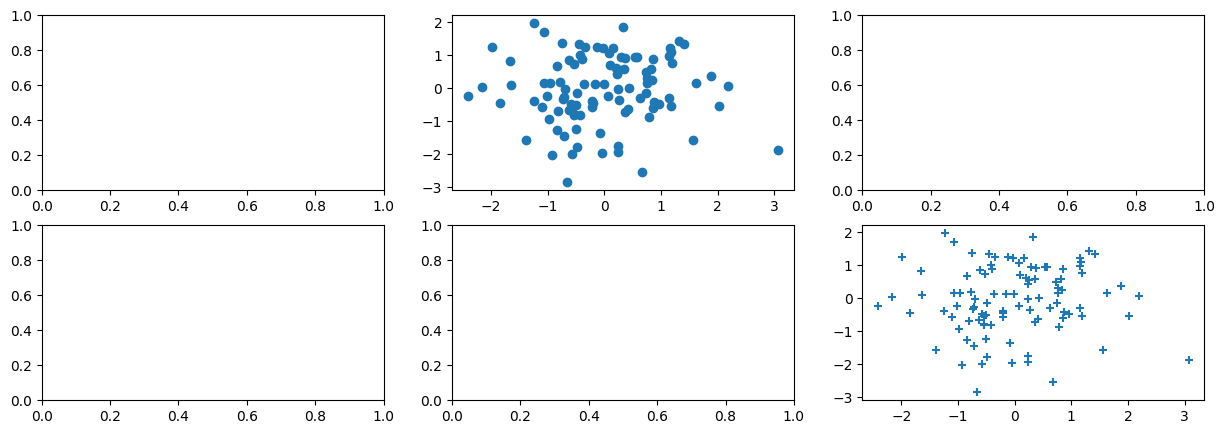

In [ ]:
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15,5))
axes[0,1].scatter(x,y)
axes[1,2].scatter(x,y,marker='+');

In [ ]:
from plotnine.data import economics
from plotnine import *

In [ ]:
df = pd.DataFrame(economics)
df.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4843.510453,257189.381533,7.936585,8.610105,7771.557491
std,3579.287206,36730.801593,3.124394,4.108112,2641.960571
min,507.400000,198712.000000,1.900000,4.000000,2685.000000
25%,1582.225000,224896.000000,5.500000,6.000000,6284.000000
50%,3953.550000,253060.000000,7.700000,7.500000,7494.000000
75%,7667.325000,290290.750000,10.500000,9.100000,8691.000000
max,12161.500000,320887.000000,17.000000,25.200000,15352.000000


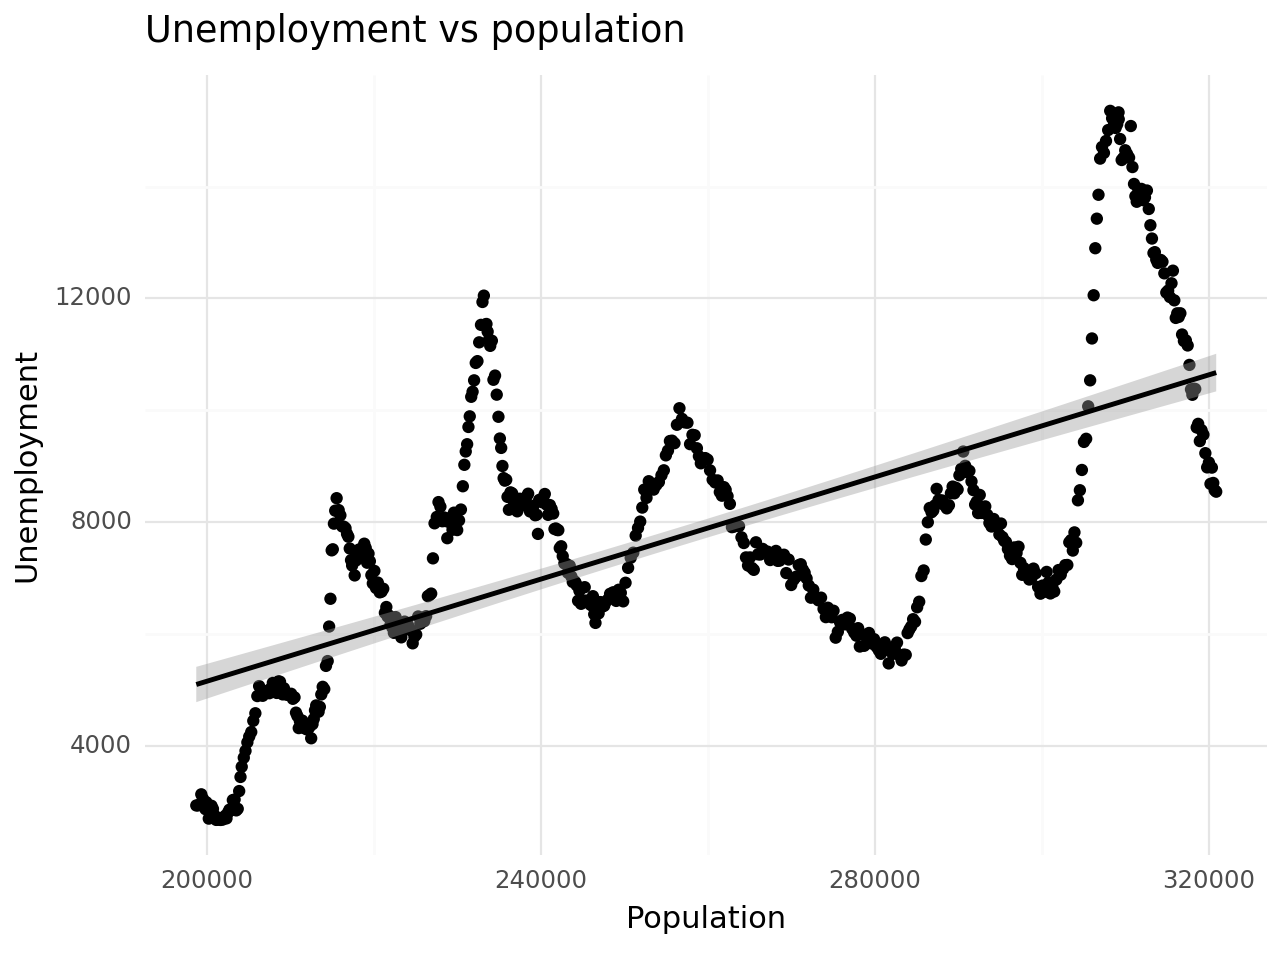

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df,
        aes(x="pop", y="unemploy"))
+ geom_point()
+ geom_smooth(method="lm", formula="y~x")
+ labs(x="Population", y="Unemployment",
       title="Unemployment vs population")
+ theme_minimal())

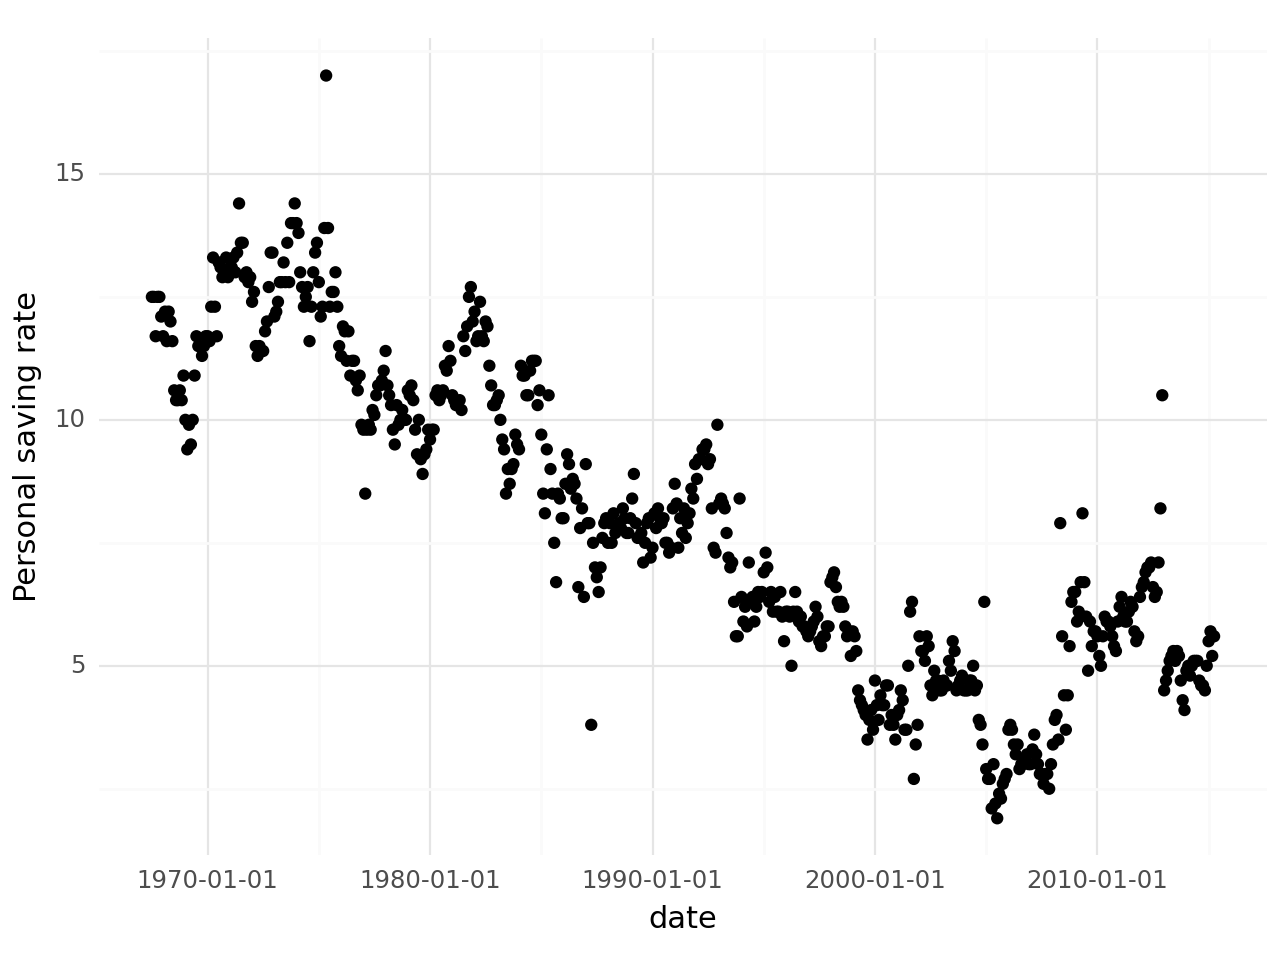

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(df)
    + geom_point(aes("date","psavert"))
    + labs(y="Personal saving rate")
    + theme_minimal()
)

In [ ]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta # becuase timedelta doesn't deal with months so relativedelta can be used for that

In [ ]:
datetime.now()

datetime.datetime(2024, 3, 25, 5, 39, 44, 878882)

In [ ]:
datetime.now().strftime('%Y-%m-%d')

'2024-03-25'

In [ ]:
now = datetime.now()
next_week = now + timedelta(weeks=1)
next_month = now + relativedelta(months=1)
print(f"Today is {now.strftime('%Y-%m-%d')}, next week is {next_week.strftime('%Y-%m-%d')} and next months is {next_month.strftime('%Y-%m-%d')}.")

Today is 2024-03-25, next week is 2024-04-01 and next months is 2024-04-25.


# Hands On ML with SciKit Learn  


## CH2- End-to-End ML Project  

### Download the data  

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

### Read data in & load libraries

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

from matplotlib.pyplot import subplots
import seaborn as sns
%matplotlib inline

import sklearn

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.shape

(20640, 10)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


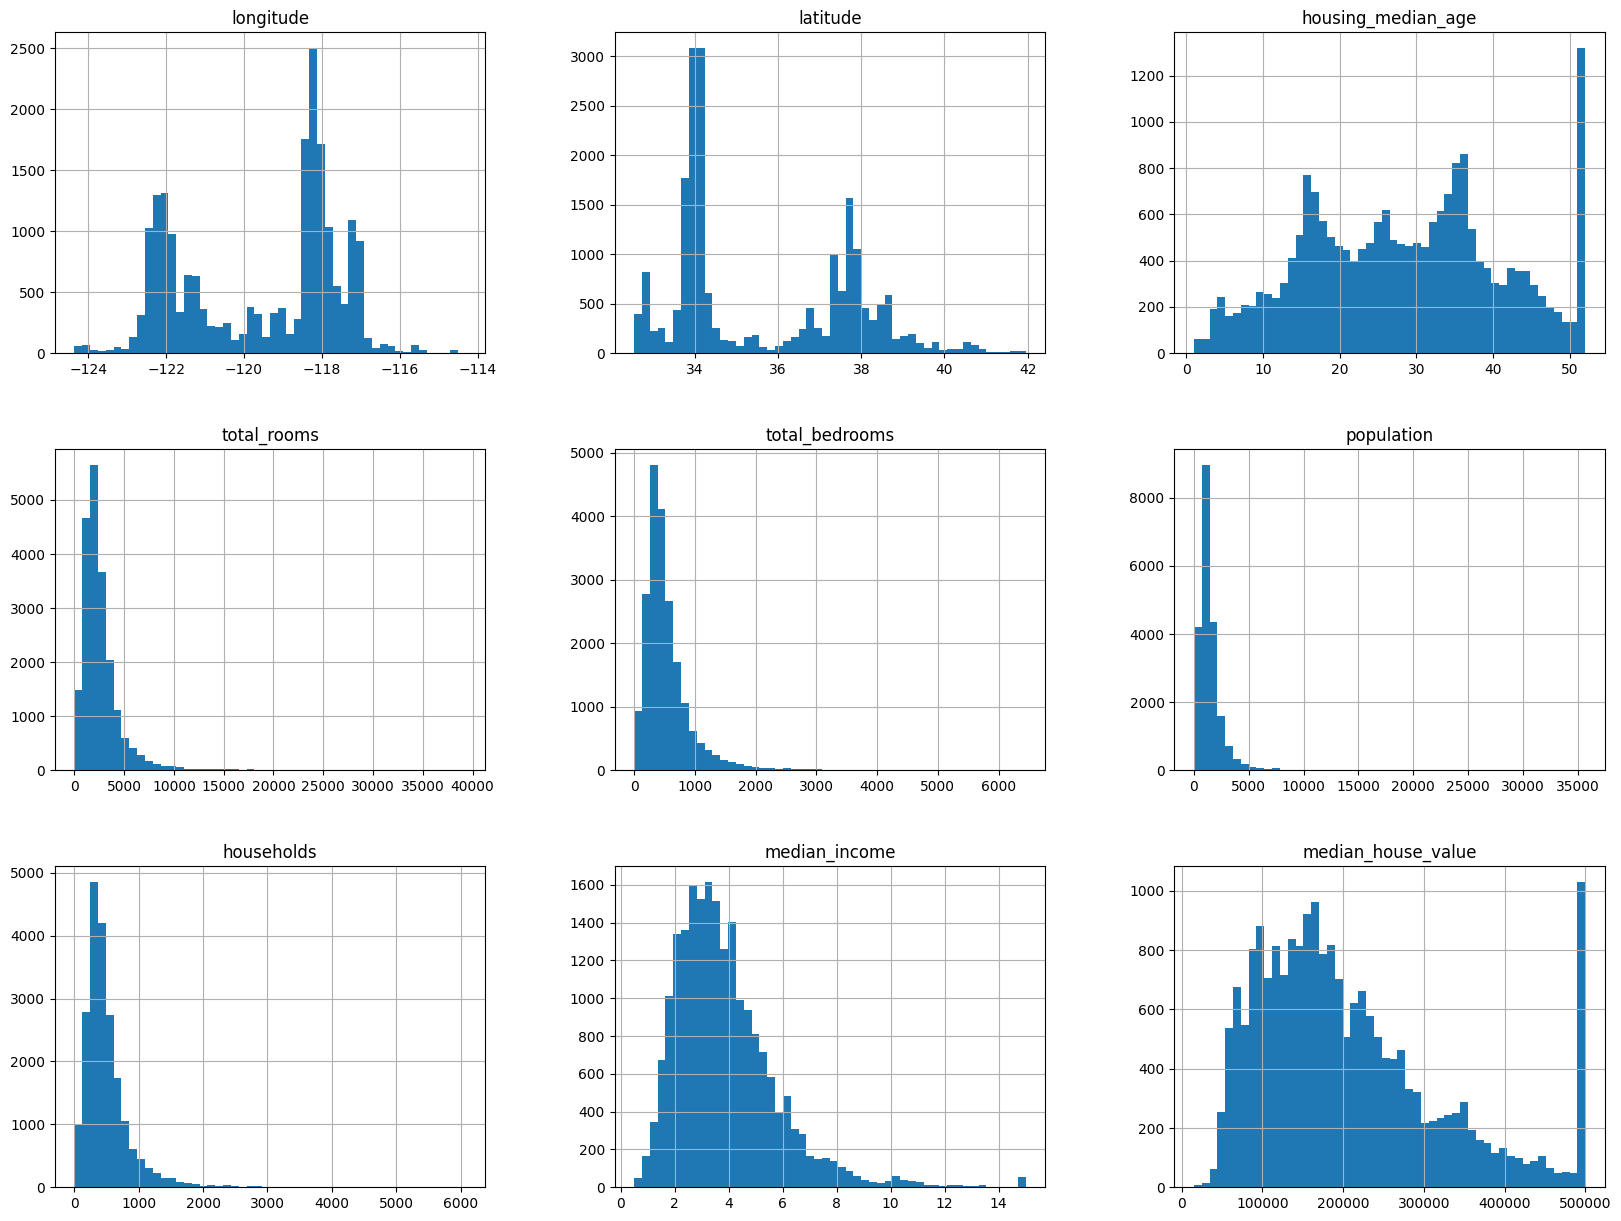

In [10]:
housing.hist(bins=50, figsize=(20,15));

Known problems with this dataset:  
1. Median_income is capped at both ends. At the lower end it is 5 and at the upper end it is capped at 15. These values are in $10,000.  

2. The median house value is also capped - which is a problem because that is our target variable. It is capped at $500,000.  

3. Median age is also capped.  

Other problems:  
1. Some histograms are tail heavy i.e. they extend far into the right. This will need adjustment  
2. Most variables have very differnet scales. The data will need to be scaled appropriately.  


## Create test set  

In [11]:
def split_train_set(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data)) #this shuffles the indices of the data
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = split_train_set(housing, 0.2)
len(train_set), len(test_set)

(16512, 4128)

### Note on using Hash to split train & test sets  
Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.  

One solution is to save the test set on the first run and then load it in subsequent runs. Another option is to set the random number generator’s seed (e.g., `np.random.seed(42)`) before calling `np.random.permutation()`, so that it always generates the same shuffled indices.  

But both these solutions will break next time you fetch an updated dataset. A common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will
not contain any instance that was previously in the training set.  



In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: ylabel='Frequency'>

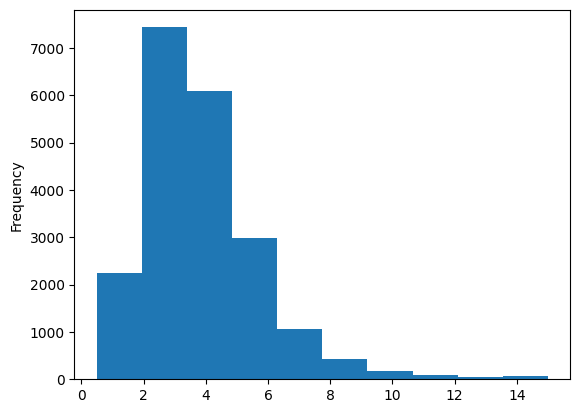

In [14]:
housing.median_income.plot.hist()

<Axes: >

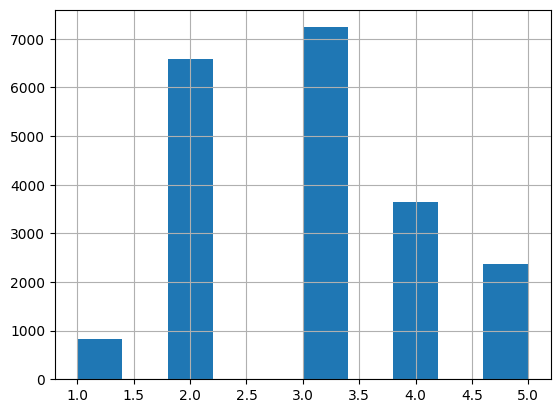

In [15]:

housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])
housing["income_cat"].hist()

Assuming that an expert told us that Median Income is a very important variable and therefore our train-test split must not just to a do simple random sampling because it could result in biased dataset. Stratified sampling is a better option here. We have created categories of median income and are doing to use `sklearn`'s stratified sampling method.  

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [17]:
strat_train_set.value_counts("income_cat") / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
dtype: float64

In [18]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [19]:
train_set["income_cat"] = pd.cut(train_set["median_income"],
                                 bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1,2,3,4,5])
train_set["income_cat"].value_counts() / len(train_set)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

You can see from the above output that the stratified sampling did a good job of upto 4 decimal spaces while random sampling was not able to do that well.  

In [20]:
# dropping the new column so that the data is back to it's true columns
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

## Data Viz to Gain Insights  

In [21]:
# for ggplot
from plotnine import *

In [22]:
#make copy of training data so that we dont change it
housing = strat_train_set.copy()

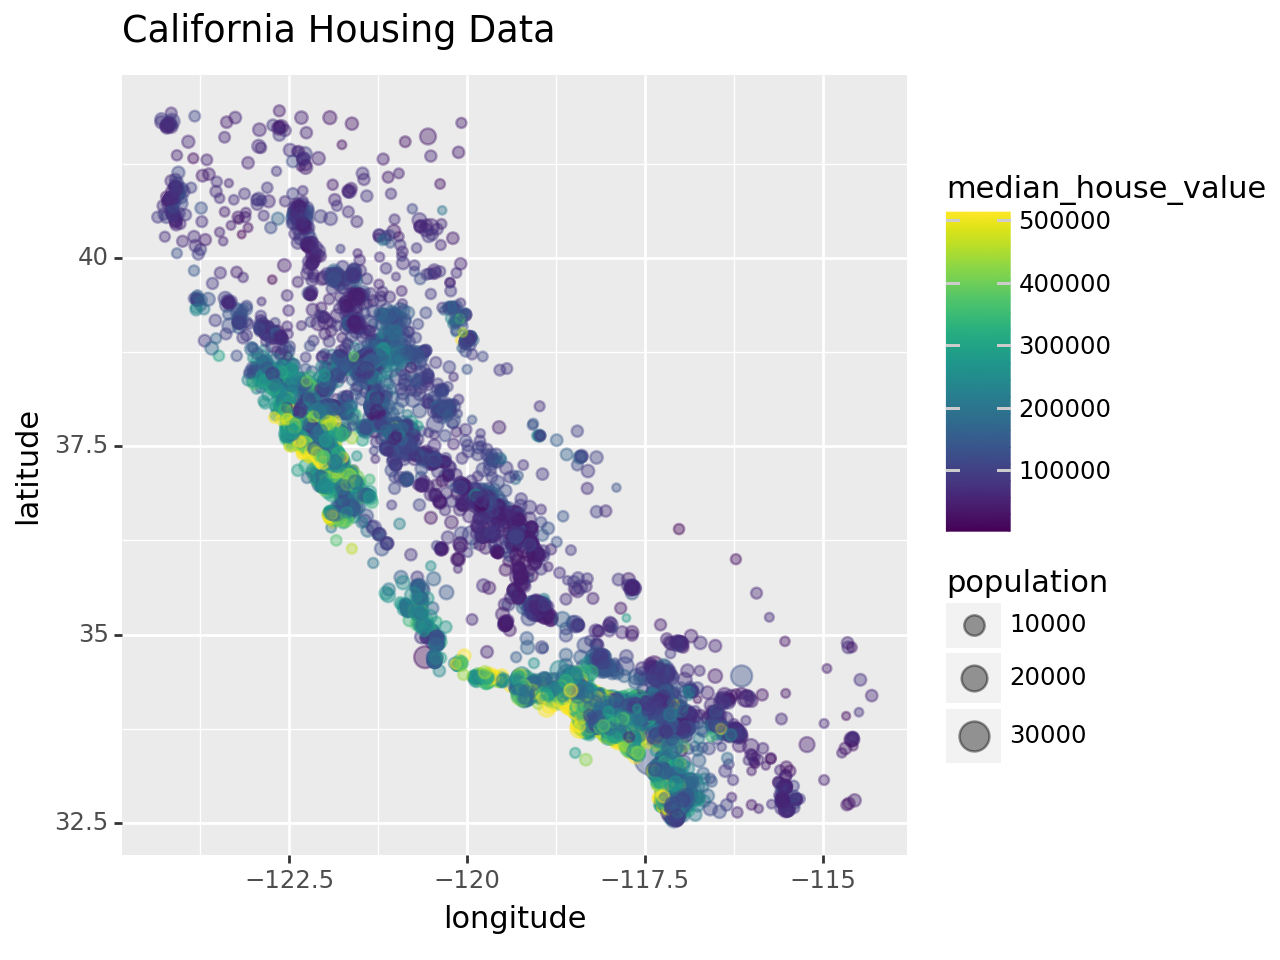

<Figure Size: (640 x 480)>

In [23]:
(
    ggplot(housing)
    + aes(x="longitude", y="latitude", color="median_house_value", size="population")
    + geom_point(alpha=0.4)
    + ggtitle("California Housing Data")
)

### Shall we use a clustering method?  
Looks location and population have a role to play.  It will be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute might be useful as well, although in Norther California the housing prices in coastal districts are not too high, so it is not a simple rule.  

In [24]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-24-2df75c723d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

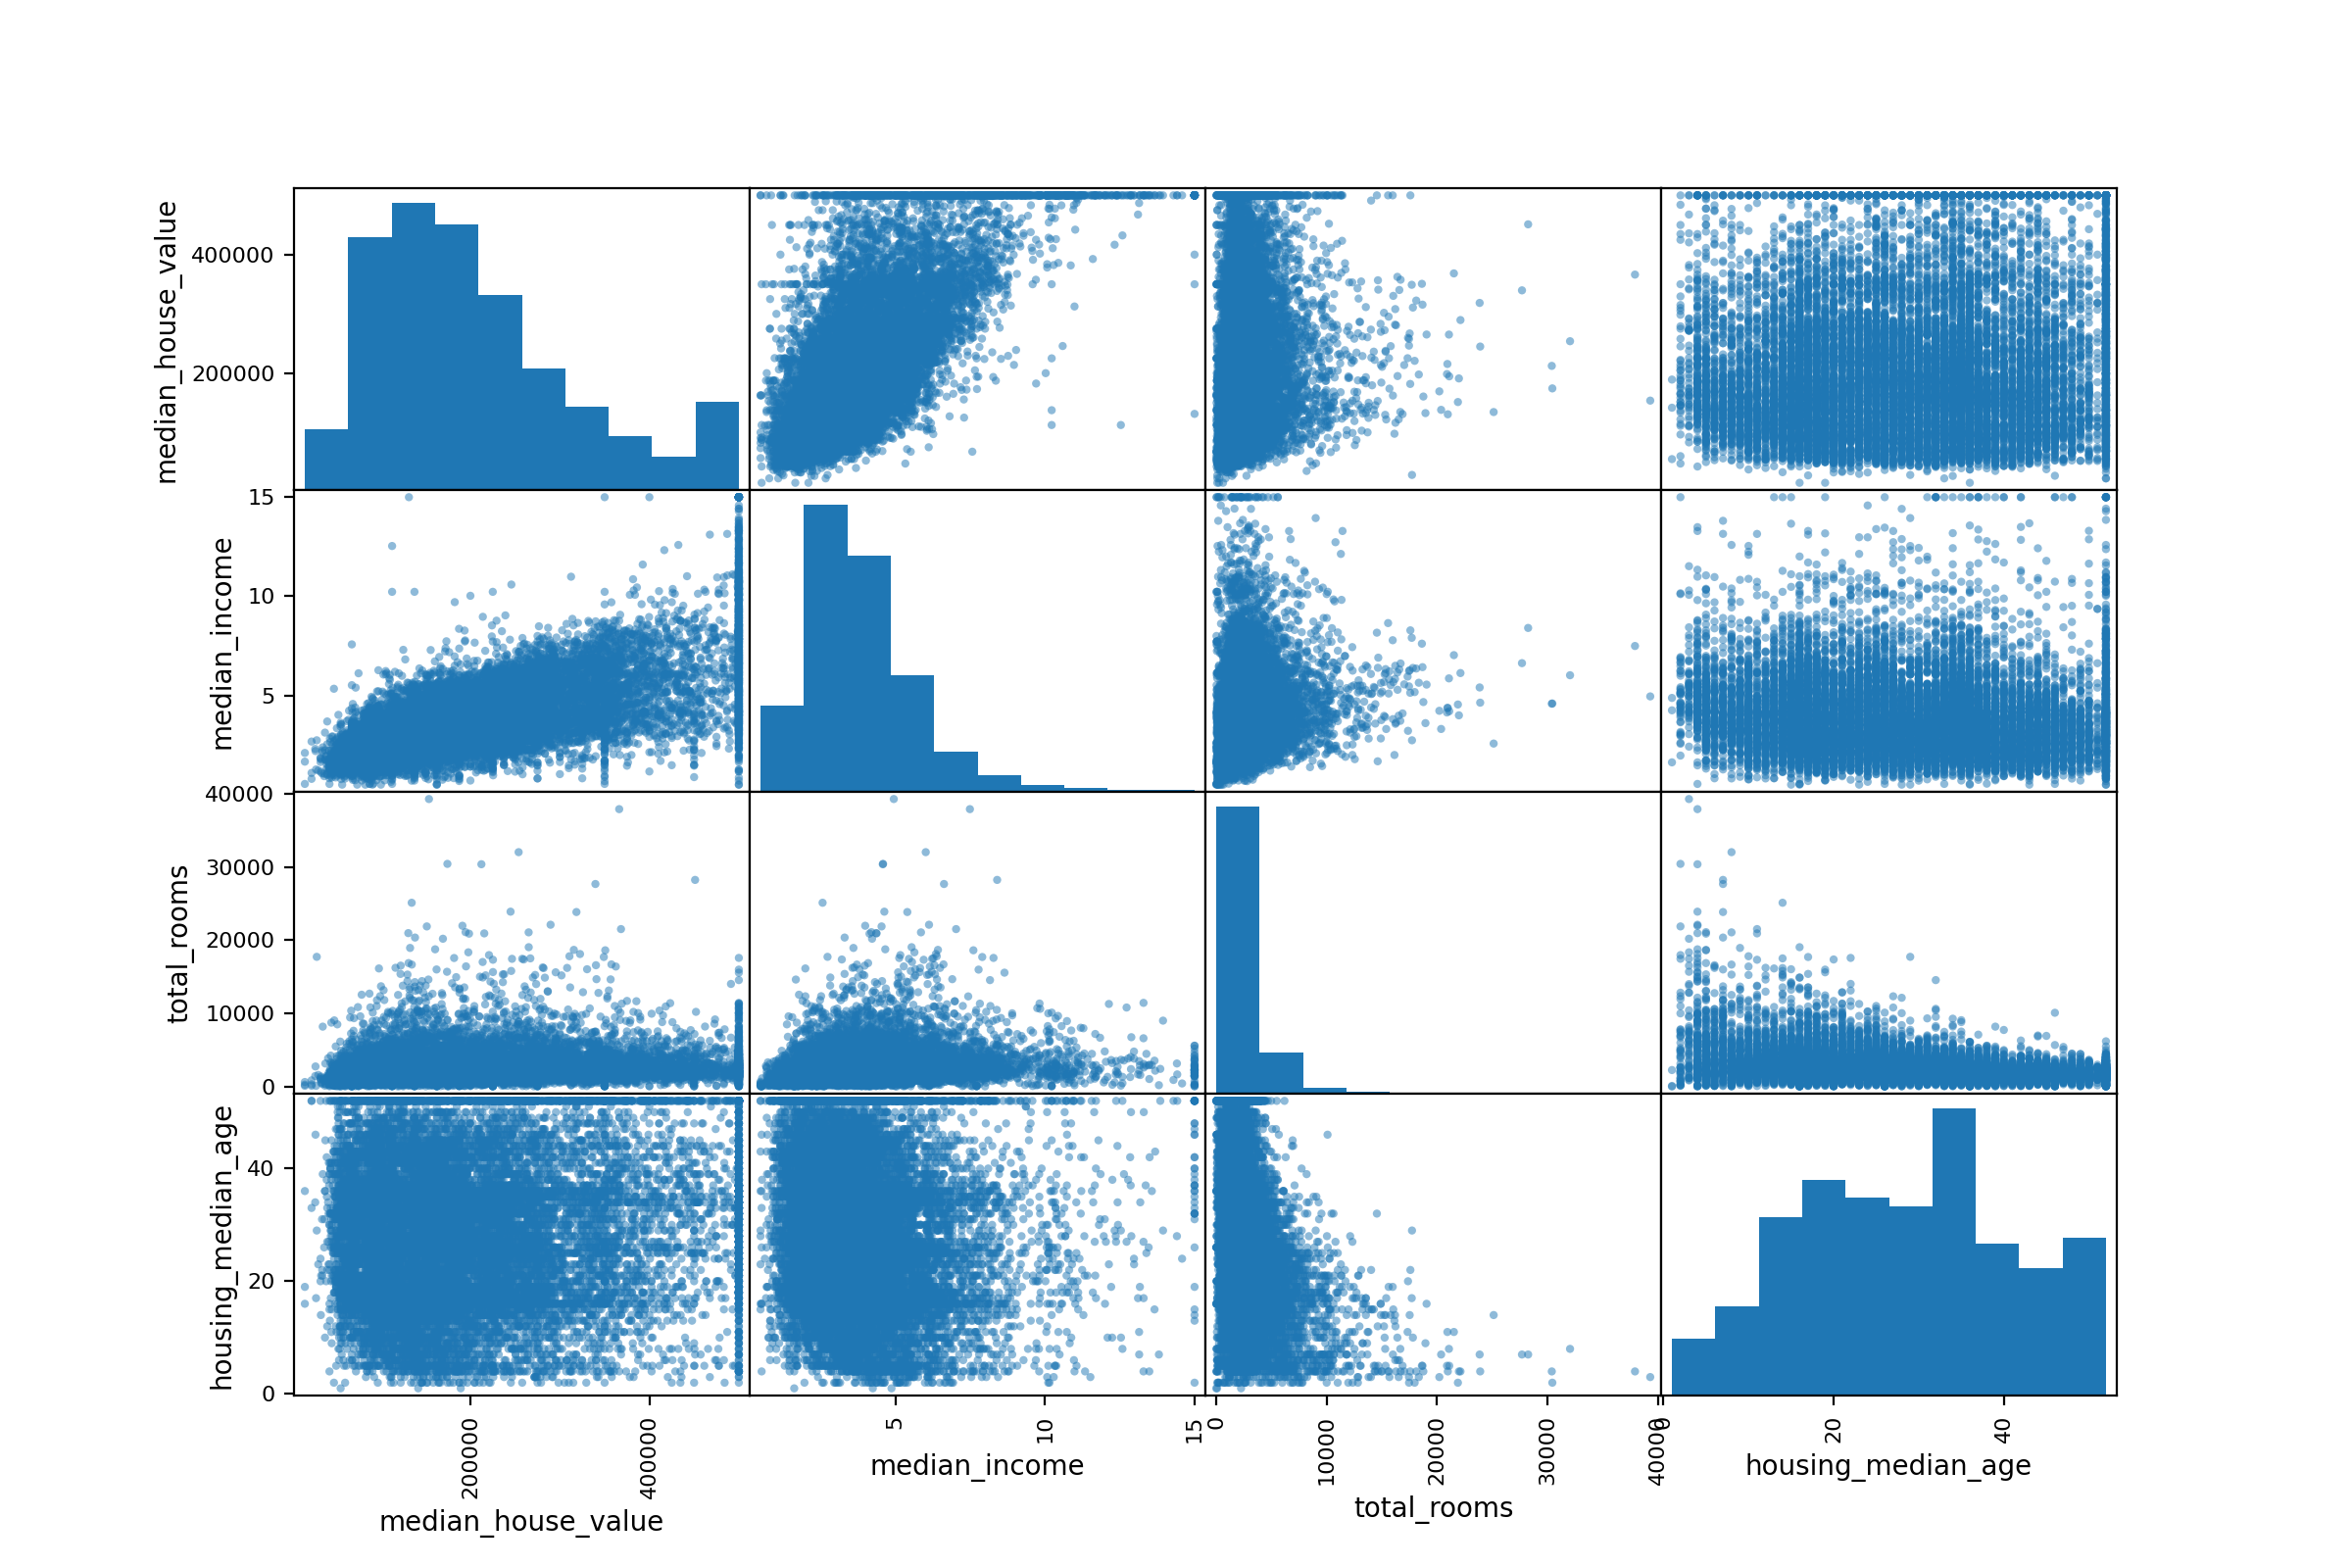

In [25]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12,8));

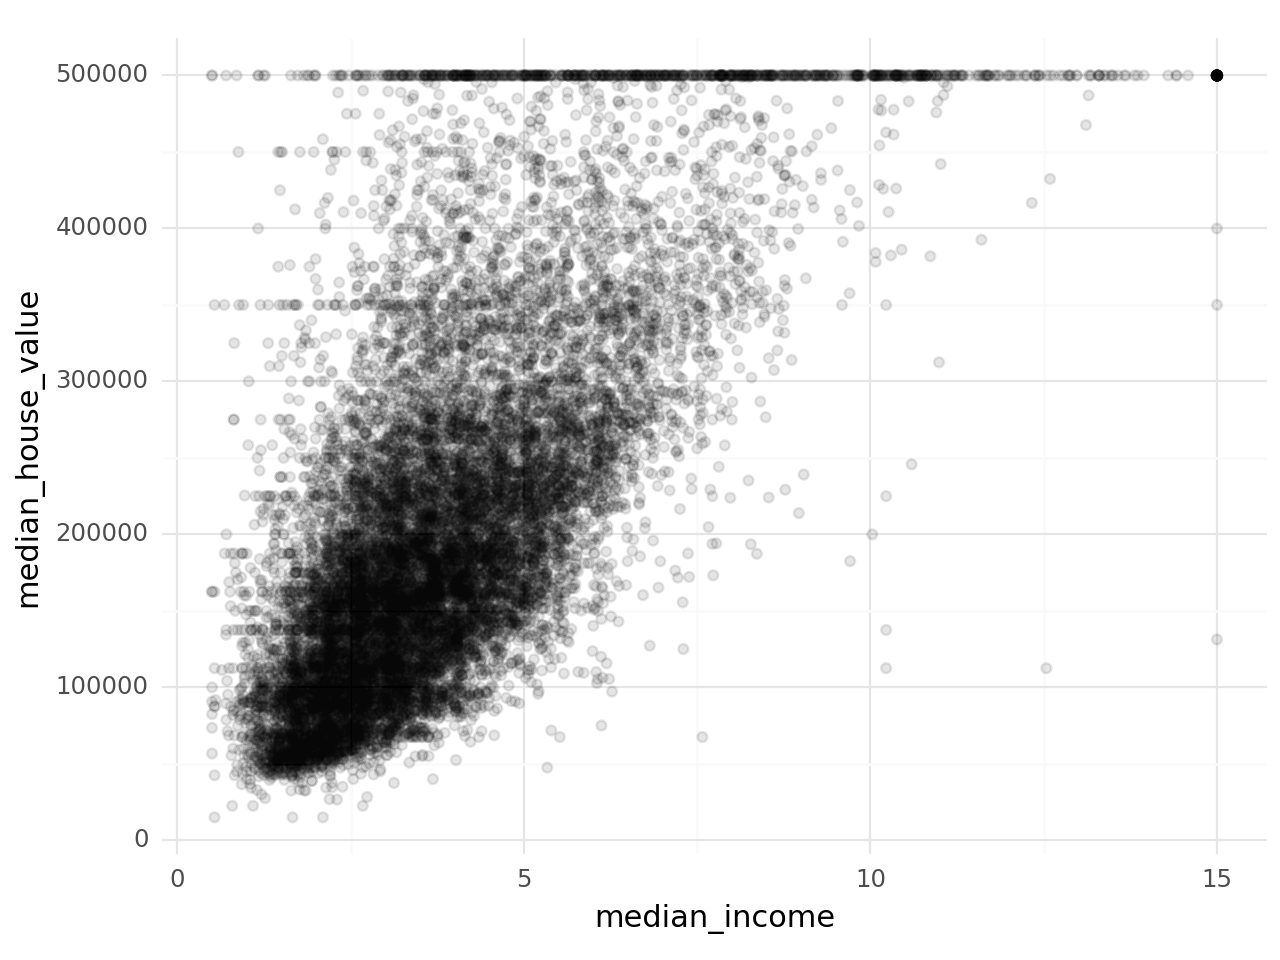

<Figure Size: (640 x 480)>

In [26]:
# most promising corr is median_house_value & median_income

(
    ggplot(housing)
    + aes(x="median_income", y="median_house_value")
    + geom_point(alpha=0.1)
    + theme_minimal()
)

The horizontal line at the \$500k mark is a known quirk of this dataset but there are a few more horizontal lines at \$450k, \$350k and \$280k. We might want to do something about it otherwise our data will learn these quirks.

### Experimenting with attribute combinations  
The total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at  


In [27]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [28]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-28-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Data Cleaning

#### Missing values   
`total_bedrooms` has missing values. We have three options:  
1. Delete the rows (i.e. district, since each row is a district)  
2. Drop the attribute  
3. Impute - zero, mean, median, etc.  

If we choose to **impute** using mean or median or somethign like that then we need to store that value somewhere so that we can reuse it when we get the test data or more datasets. We cannot impute values every time we get new data, we have to re-use the originally imputed value.  

We will use `sklearn`'s `SimpleImputer` to impute the median. A median can only be measured for numerical vars. Even though `total_bedrooms` is the only variable that has missing values, we will still calculate the median for all numerical variables because when new data comes, it is possible that some other variable has missing values so it is best to capture and store these values to make our lives easier in the future.  

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
pd.DataFrame({"varialbs": housing_num.columns, "median": imputer.statistics_})



,varialbs,median
0,longitude,-118.510000
1,latitude,34.260000
2,housing_median_age,29.000000
3,total_rooms,2119.000000
4,total_bedrooms,433.000000
5,population,1164.000000
6,households,408.000000
7,median_income,3.541550
8,median_house_value,179500.000000
9,rooms_per_household,5.232342


In [38]:
X = imputer.transform(housing_num) # NumPy array that we will use for modelling
housing_tr = pd.DataFrame(X, columns=housing_num.columns) #Pandas DF for exploring

#### Handling text and categorical variables  

In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat = housing[["ocean_proximity"]]

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

This method of creating ordinal varialbes (0, 1, 2, 3, 4) can make ML algorithms treat categories 0 and 1 as more similar than 0 and 4 because a lot of ML algorithms are based on distance and since 1 is closer to 0 than 4 is, the algorithm will assume that the category that is represented by 1 is more similar to the category represented by 0 than the category represented by 4. This is actually not the case and hence we need to try a different type of encoding to resolve this. The way to do it is to use binary encoding, also called **One-Hot Encoding**.  

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

A sparse matrix is used when most values are empty (or zeroes) and only some cells have non-zero values. A sparse matrix therefore only stores the location of non-zero values and its values thereby creating a very efficient storage mechanism. We can still run matrix operations like you would do in any 2D array.   

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

***Note on Representation Learning***  

When we have many categories for a variable then we will end up with a very large sparse matrix. Sometimes we can abstract it to make it smaller but sometimes we can use embeddings which will give us a single numerical value for the variable instead of using a large sparse vector for one variable. This type of learning is called **Representation Learning**  

## Transformation Pipelines



### Custom Transformers  

If you often find yourself creating your own transformers and not using one of the existing transformer from sklearn then it provides some easy ways of creating your own `class` using `BaseEstimator` and `TransformerMixin` and adding specific transformation functions within your newly created `class`. This gives you some things from free and makes your class of functions consistent with the rest of `sklearn`.  

Take a look below where we are creating a transformer that created our previous transformations of `rooms_per_household`, `population_per_household` and `bedrooms_per_room`.  

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

# notice that these variables are defined outside the class definition at global level
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                  bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)


### Feature Scaling  

ML algos don't work well when variables vary in scales. Note that the target variable does not need to be rescaled but input variables do need scaling.   

There are two  common ways to do scaling:  
1. Min-max scaling (also called normalization)    
2. Standardization  

**Min-max scaling** is done by subtracting the `min` value and dividing by `(max - min)`. This rescales the values to fall between 0 to 1. In sklearn you can use **`MinMaxScalar`** to do this.  

**Standardization**- subtract the mean (this makes the values have a mean of 0) and then divide by standard deviation, so that the variance is 1. Unlike min-max scaling, this method does not bind the values within a range of 0 to 1 (this can be a problem for some algos like neural networks, which expect values to range between 0 and 1). Standardization does not get very affected by outliers but Min-Max gets affected because they heavily influence the *Max* value and can artificially push a lot of values into a very small range. In sklearn you can use **`StandardScaler`** to do standardization.   



In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

### Transformation Pipelines  
The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a `fit_transform()` method). The names can be anything you like (as long as they are unique and don’t contain double underscores “__”): they will come in handy later for hyperparameter tuning.  

When you call the pipeline’s `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the `fit()` method.  


The pipeline created above is only for numerical pipelines but `sklearn` also supports categorical pipelines now and so we can create one pipeline that transforms our numercial and categorical data. We will use **`ColumnTransformer`** for this.   

The constructor for this requires a list of tuples where each tuple contains:   

* a name  
* a transformer  
* a list of names (or indices) of columns that the transformer should be applied to  

In [72]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select & Train a Model  